# Problem Set 1
Due April 11th at 5:30pm -- at the start of the class so we can
discuss the solutions in class.

### Before You Start

Make sure to at least take a basic tutorial in the IPython notebook,
otherwise you'll be totally lost.  For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.



## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.


## Preliminaries

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.14.0 (need at least 1.7.1)
SciPy version:         1.0.0 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Mapltolib version:     2.1.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


In [2]:
## Let's read the data and print some summary information
## adjust the path for your file system!
flights_df= pd.read_csv ('flights.csv.bz2')

In [3]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [4]:
print (flights_df.dest.unique())
print (flights_df.head(10))

['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']
   Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0           1  2013      1    1     517.0        2.0     830.0       11.0   
1           2  2013      1    1     533.0        4.0     850.0       20.0   
2           3  2013      1    1     542.0        2.0     923.0       33.0   
3           4  2013      1    1     544.0       -1.0

## Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [5]:
# Extract the flights with NYC airports as 'origin' and SEA airport as 'dest' in 2013
flights_NYC_to_SEA = flights_df[
    np.logical_and(
        flights_df['origin'].isin(['JFK', 'EWR', 'LGA']), 
        flights_df['dest'] == 'SEA'
    )
]

# Print the shape of the extracted dataframe
print(flights_NYC_to_SEA[flights_NYC_to_SEA['year'] == 2013].shape[0])

3923


 There were 3923 flights from NYC airports to Seattle in 2013. 

(b) How many airlines fly from NYC to Seattle?

In [6]:
# Print the count of the airlines that fly from NYC to Seattle
print(flights_NYC_to_SEA['carrier'].unique())
print(len(flights_NYC_to_SEA['carrier'].unique()))

['AS' 'DL' 'UA' 'B6' 'AA']
5


There are 5 airlines that fly from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [7]:
# Print the count of the unique air planes that fly from NYC to Seattle
print("Total number of unique air planes that fly from NYC to Seattle (including NaN): " +
      str(len(flights_NYC_to_SEA['tailnum'].unique())) + "\n")

# Number of observations with null values
print("Number of observations with NaN as 'tailnum': "+ str(sum(flights_NYC_to_SEA['tailnum'].isnull())) + "\n")

# Print the count of unique air planes without NaN values
print("Total number of unique air planes that fly from NYC to Seattle (excluding NaN): " + 
      str(len(flights_NYC_to_SEA[np.logical_not(flights_NYC_to_SEA['tailnum'].isnull())]['tailnum'].unique())))

Total number of unique air planes that fly from NYC to Seattle (including NaN): 936

Number of observations with NaN as 'tailnum': 6

Total number of unique air planes that fly from NYC to Seattle (excluding NaN): 935


There are 935 unique air planes that fly from NYC to Seattle (if we exclude the NaN value for 6 observations).

(d) What is the average arrival delay for flights from NYC to Seattle?

In [8]:
# Print the mean arrival delay for flights from NYC to Seattle
print(round(flights_NYC_to_SEA['arr_delay'].mean(), 2))

-1.1


The average arrival delay for flights from NYC to Seattle is -1.1 minutes (rounded off to 2 decimal places).

(e) What proportion of flights to Seattle come from each NYC airport?

In [9]:
# Print the proportion of flights to Seattle from each NYC airport
for i in {'JFK', 'EWR', 'LGA'}:
    proportion = len(flights_NYC_to_SEA[flights_NYC_to_SEA['origin'] == i]) / len(flights_NYC_to_SEA)
    print("Proportion of flights to Seattle from " + i + " = " + str(round(proportion, 4)))

Proportion of flights to Seattle from LGA = 0.0
Proportion of flights to Seattle from JFK = 0.5333
Proportion of flights to Seattle from EWR = 0.4667


Proportion of flights to Seattle from JFK is 53.33%

Proportion of flights to Seattle from EWR is 46.67%

Proportion of flights to Seattle from LGA is 0%

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [10]:
import datetime as dt    # Import datetime module

# Print the date that has the maximum average departure delay where departure delay is greater than 0
print("Date (Largest Average Departure Delay): " + 
      str(dt.date(*(flights_df[flights_df['dep_delay'] > 0].groupby(['year', 'month', 'day']).mean()['dep_delay'].idxmax())[0:3])))

# Print the date that has the maximum average arrival delay where arrival delay is greater than 0
print("Date (Largest Average Arrival Delay): " + 
      str(dt.date(*(flights_df[flights_df['arr_delay'] > 0].groupby(['year', 'month', 'day']).mean()['arr_delay'].idxmax())[0:3])))

Date (Largest Average Departure Delay): 2013-03-08
Date (Largest Average Arrival Delay): 2013-07-10


8th March, 2013 has the largest average departure delay (if we only consider observations where 'dep_delay' is greater than 0).

10th July, 2013 has the largest average arrival delay (if we only consider observations where 'arr_delay' is greater than 0).

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [11]:
import matplotlib.pyplot as plt    # Import matplotlib.pyplot module

# Add a date column to the flights_df dataframe by combining the year, month and day columns
flights_df['date'] = pd.to_datetime((flights_df.year * 10000) + (flights_df.month * 100) + flights_df.day, format='%Y%m%d')

# Calculate the number of flights delayed for each day where delay was greater than 0
delayed_flights_by_day = flights_df[flights_df['dep_delay'] > 0].groupby(['date'])['flight'].count()

# Calculate the total number of flights for each day
count_flights_by_day = flights_df.groupby(['date'])['flight'].count()

# Get the 10 days with the highest proportion of delayed flights
print("(%) Proportion of flights delayed (in descending order, by day): \n\n" +
      str(round((delayed_flights_by_day / count_flights_by_day) * 100, 2).sort_values(ascending = False).head(10)) + 
     "\n")

# Calculate the average departure delay for each day where delay was greater than 0
average_delay_by_day = flights_df[flights_df['dep_delay'] > 0].groupby(['date']).mean()['dep_delay']

# Get the 10 days with the highest average departure delay
print("(minutes) Average departure delay (in descending order, by day): \n\n" +
      str(round(average_delay_by_day, 2).sort_values(ascending = False).head(10)) +
     "\n")

# Calculate the median departure delay for each day where delay was greater than 0
median_delay_by_day = flights_df[flights_df['dep_delay'] > 0].groupby(['date']).median()['dep_delay']

# Get the 10 days with the highest median departure delay
print("(minutes) Median departure delay (in descending order, by day): \n\n" +
      str(round(median_delay_by_day, 2).sort_values(ascending = False).head(10)))

(%) Proportion of flights delayed (in descending order, by day): 

date
2013-12-23    68.43
2013-07-01    67.49
2013-03-08    66.70
2013-06-25    65.36
2013-12-22    65.14
2013-07-23    64.69
2013-12-17    64.07
2013-05-24    63.50
2013-12-09    62.99
2013-02-27    61.80
Name: flight, dtype: float64

(minutes) Average departure delay (in descending order, by day): 

date
2013-03-08    102.90
2013-09-02    101.68
2013-09-12    100.86
2013-05-23     92.24
2013-07-10     92.02
2013-12-05     90.31
2013-07-22     85.04
2013-04-10     84.69
2013-06-24     83.92
2013-07-28     80.79
Name: dep_delay, dtype: float64

(minutes) Median departure delay (in descending order, by day): 

date
2013-03-08    81.0
2013-09-02    68.5
2013-09-12    64.0
2013-07-01    60.0
2013-05-23    58.0
2013-10-07    56.0
2013-08-28    56.0
2013-06-02    56.0
2013-12-05    54.0
2013-06-24    52.0
Name: dep_delay, dtype: float64


The worst day to fly out of NYC in 2013 was 8th March (Friday).

We arrive at this conclusion by examining the proportion of the flights delayed (66.70%), the average departure delay for the flights (102.90 minutes, where delay was greater than zero), and the median departure delay for the flights (81.0 minutes, where delay was greater than zero).

This is confirmed by the fact that NYC was under the impact of a significant snowstorm (http://www.nycareaweather.com/2013/03/march-6-8-2013-storm-summary/).

If we only consider the proportion of the flights delayed, then the worst day to fly out of NYC in 2013 was 23rd December (Monday) with 68.43% of the flights getting delayed.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

,Average Departure Delay,Number of Delayed Departures
month,,
1,35.335334,9662
2,35.299540,9124
3,39.616380,11209
4,44.185241,10543
5,39.245151,11291
6,49.790913,12655
7,48.807822,13909
8,37.274311,11713
9,35.676775,7815


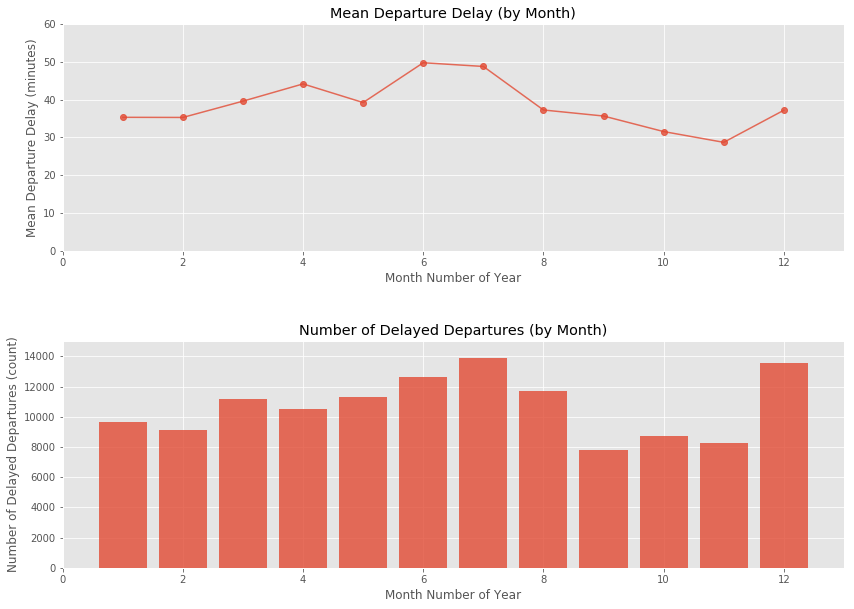

In [12]:
# Calculate the average departure delays by month where delay was greater than 0
average_delay_by_month = flights_df[flights_df['dep_delay'] > 0].groupby(['month'])['dep_delay'].mean()

# Calculate the count of delayed departures by month where delay was greater than 0
count_delay_by_month = flights_df[flights_df['dep_delay'] > 0].groupby(['month'])['flight'].count()

plt.style.use('ggplot')                                           # Select 'ggplot' style
plt.figure(figsize=(14,10))

plt.subplot(2, 1, 1)                                              # Define subplot index
plt.plot(average_delay_by_month, marker = 'o', alpha = 0.8)       # Plot average delay by month
plt.title('Mean Departure Delay (by Month)')                      # Define title
plt.ylabel('Mean Departure Delay (minutes)')                      # Define y-label
plt.xlabel('Month Number of Year')                                # Define x-label
plt.xlim(0,13)                                                    # Define x-axis limits
plt.ylim(0,60)                                                    # Define y-axis limits

plt.subplot(2, 1, 2)                                              # Define subplot index
plt.bar(count_delay_by_month.index.values, count_delay_by_month, align = 'center', alpha = 0.8)       
                                                                  # Plot average delay by month
plt.title('Number of Delayed Departures (by Month)')              # Define title
plt.ylabel('Number of Delayed Departures (count)')                # Define y-label
plt.xlabel('Month Number of Year')                                # Define x-label
plt.xlim(0,13)                                                    # Define x-axis limits
plt.ylim(0,15000)                                                 # Define y-axis limits

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

plt.show                                                          # Show the plot

# Print the calculated values
pd.concat([average_delay_by_month, count_delay_by_month], axis = 1, 
          keys = ['Average Departure Delay', 'Number of Delayed Departures'])

Yes, we can observe seasonal patterns in departure delays for flights from NYC. 

Based on the observations made using the charts above:

We see that the 'mean departure delay' starts rising from the 1st month of January till the 4th month of April, followed by a decline in the 5th month of May. It starts rising again till we see a peak during the summer months of June and July, followed by a decline till the 11th month of November. We see a rise again for the month of December.

We see a similar trend for the 'number of delayed departures', except that in December, the number of delayed departures become comparable with the number of delayed departures in the month of July.

The reason for the June-July peak in the Mean Departure Delay (minutes) could be because of the following reasons:

1) Higher air-traffic during the summer vacation months with frequent flights connecting European destinations

2) Difficult weather conditions at NYC caused by summer thunderstorms (convective weather)

3) Runway repairs that couldn't happen during the colder winter months


(http://fortune.com/2015/05/28/worst-airports-delays-summer/)

(https://lifehacker.com/why-there-are-so-many-flight-delays-in-the-summertime-1796465726)



(d) On average, how do departure delays vary over the course of a day?

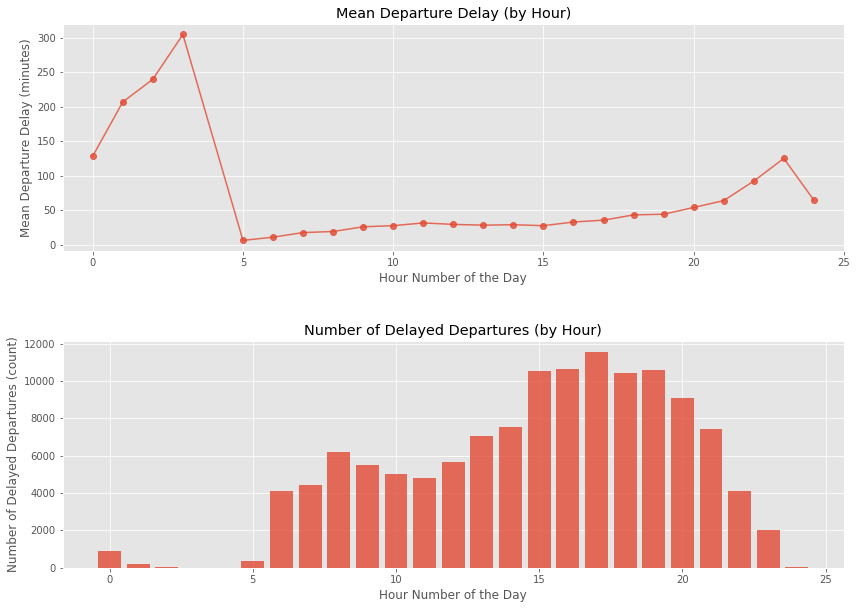

,Average Departure Delay,Number of Delayed Departures,Proportion of Flights Delayed (%)
hour,,,
0.0,128.642452,881.0,100.00
1.0,207.049327,223.0,100.00
2.0,239.921875,64.0,100.00
3.0,304.727273,11.0,100.00
4.0,NaN,NaN,NaN
5.0,6.592391,368.0,5.08
6.0,11.272904,4126.0,18.18
7.0,17.932435,4455.0,20.76
8.0,19.484653,6190.0,23.43


In [13]:
# Calculate the average departure delays by hour where delay was greater than 0
average_delay_by_hour = flights_df[flights_df['dep_delay'] > 0].groupby(['hour'])['dep_delay'].mean()

# Calculate the number of delayed departures by hour where delay was greater than 0
count_delay_by_hour = flights_df[flights_df['dep_delay'] > 0].groupby(['hour'])['flight'].count()

# Calculate the proportion of flights delayed by hour where delay was greater than 0
proportion_delay_by_hour = round((count_delay_by_hour / flights_df.groupby(['hour'])['flight'].count()) * 100, 2)

# Plot the figure
plt.figure(figsize=(14,10))

plt.subplot(2, 1, 1)
plt.plot(average_delay_by_hour, marker = 'o', alpha = 0.8)
plt.xlim(-1,25)
plt.title('Mean Departure Delay (by Hour)')
plt.ylabel('Mean Departure Delay (minutes)')
plt.xlabel('Hour Number of the Day')

plt.subplot(2, 1, 2)
plt.bar(count_delay_by_hour.index, count_delay_by_hour, alpha = 0.8)
#plt.xlim(-1,25)
plt.title('Number of Delayed Departures (by Hour)')
plt.ylabel('Number of Delayed Departures (count)')
plt.xlabel('Hour Number of the Day')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

plt.show()

# Print
pd.concat([average_delay_by_hour, count_delay_by_hour, proportion_delay_by_hour], axis = 1, 
          keys = ['Average Departure Delay', 'Number of Delayed Departures', 'Proportion of Flights Delayed (%)'])

We see that the 'average departure delay' starts approximately at 125 minutes at 00:00 hours and increases till 03:00 hours where it reaches close to 300 minutes. Next, we see that the average departure delays starts increasing gradually from 05:00 hours (close to 0 minutes) till 20:00 hours (close to 50 minutes). After 20:00 hours, it starts increasing rapidly till it reaches close to 125 minutes at 23:00 hours.

We could probably relate the observed trend with the number of delayed departures. One could guess, that there are hardly any flights from the 00:00 hours till the 05:00 hours, and the delayed flights are very few. 

As we start with the day at 05:00 hours, we see a rise in the number of flights as well as the mean departure delays as we advance through the day. 

## Question 3
   Which flight departing NYC in 2013 flew the fastest?

In [14]:
# Calculate the average speed of the flight
flights_df['speed'] = flights_df['distance'] / (flights_df['air_time'] / 60)

# Print
flights_df.sort_values(['speed'], ascending = False).head(5)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,2013-05-25,703.384615
251999,252000,2013,7,2,1558.0,45.0,1745.0,26.0,EV,N17196,4667,EWR,MSP,93.0,1008,15.0,58.0,2013-07-02,650.322581
205388,205389,2013,5,13,2040.0,15.0,2225.0,-1.0,EV,N14568,4292,EWR,GSP,55.0,594,20.0,40.0,2013-05-13,648.000000
157516,157517,2013,3,23,1914.0,4.0,2045.0,2.0,EV,N12567,3805,EWR,BNA,70.0,748,19.0,14.0,2013-03-23,641.142857
10223,10224,2013,1,12,1559.0,-1.0,1849.0,-28.0,DL,N956DL,1902,LGA,PBI,105.0,1035,15.0,59.0,2013-01-12,591.428571


On 5/25/2013, Flight number 1499 of DL carrier from LGA (New York City) to ATL (Atlanta) flew the fastest with an average speed of 703.384 flight miles/hour, where it covered the distance of 762 flight miles in 65 minutes.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [15]:
# Calculate the count of flights
flights_per_year = flights_df.groupby(['carrier', 'flight', 'dest']).size().reset_index(name = 'frequency')

# Print the flights with maximum count
flights_per_year[flights_per_year.frequency == max(flights_per_year.frequency)]

,carrier,flight,dest,frequency
767,AA,59,SFO,365
775,AA,119,LAX,365
783,AA,181,LAX,365
904,AA,1357,SJU,365
914,AA,1611,MIA,365
1118,B6,219,CLT,365
1147,B6,359,BUR,365
1150,B6,371,FLL,365
1169,B6,431,SRQ,365
1243,B6,703,SJU,365


These 18 flights happen everyday.

They fly to: 'SFO' - San Francisco, 'LAX' - Los Angeles, 'SJU' - San Juan, 'MIA' - Miami, 'CLT' - Charlotte, 'BUR' - Burbank, 'FLL' - Fort Lauderdale, 'SRQ' - Sarasota, 'MCO' - Orlando, 'TPA' - Tampa, 'IAD' - Dulles, 'HNL' - Honolulu, and 'LAS' - Las Vegas.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


Please enter the minimum and maximum distances for investigation: 

- Minimum (in flight miles) (please enter a numerical value): 100

- Maximum (in flight miles) (please enter a numerical value): 1500


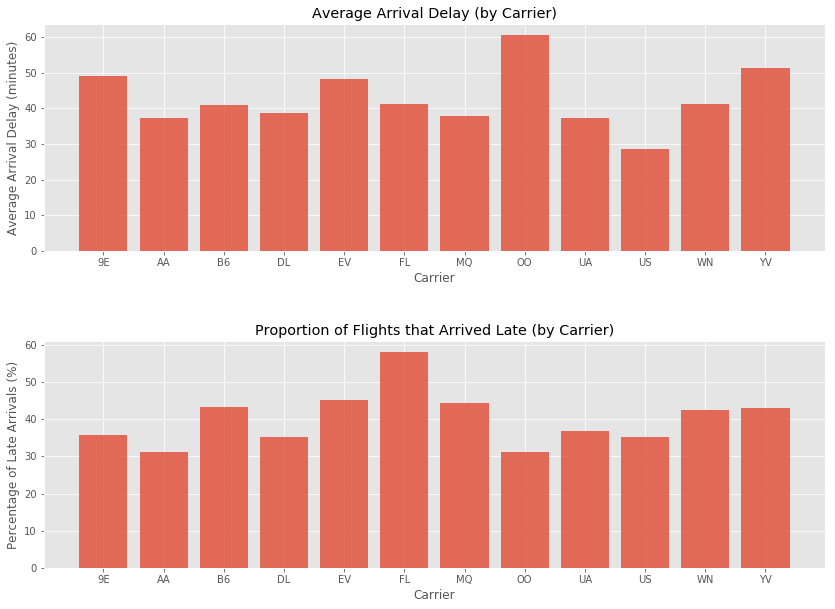

,Average Arrival Delay,Proportion of Flights with Delayed Arrivals (%)
carrier,,
9E,49.215762,35.75
AA,37.176271,31.25
B6,41.032445,43.28
DL,38.761747,35.26
EV,48.263612,45.20
FL,41.094459,58.13
MQ,37.852048,44.30
OO,60.600000,31.25
UA,37.296161,36.96


In [16]:
# Take the minimum and maximum distance for investigation as input from the user

min_dist = float(input('Please enter the minimum and maximum distances for investigation: \n\n- Minimum (in flight miles) (please enter a numerical value): '))
print('')
max_dist = float(input('- Maximum (in flight miles) (please enter a numerical value): '))

def plot_metrics(range_start, range_end):
    """This function accepts the minimum and maximum distances for investigation: 'Best Airlines'"""
    
    # Split the data based on the flight miles input by user
    flights_df_temp = flights_df[np.logical_and(flights_df['distance'] >= range_start, flights_df['distance'] <= range_end)]

    ### Let's try to find out the best carrier based on the proportion of flights which arrived late

    # Calculate the average arrival delay
    average_delay_temp = flights_df_temp[flights_df_temp['arr_delay'] > 0].groupby(['carrier'])['arr_delay'].mean()

    # Calculate the total number of flights by carrier
    total_flights_temp = flights_df_temp.groupby(['carrier']).size()

    # Calculate the total number of flights that arrived late
    flights_delayed_temp = flights_df_temp[flights_df_temp['arr_delay'] > 0].groupby(['carrier']).size()

    # Calculate the proportion of flights that arrived late
    proportion_arrived_late_temp = round((flights_delayed_temp / total_flights_temp) * 100, 2)
    
    # Plot

    plt.figure(figsize=(14,10))
    
    plt.subplot(2, 1, 1)
    plt.bar(average_delay_temp.index, average_delay_temp, alpha = 0.8)
    plt.title('Average Arrival Delay (by Carrier)')              
    plt.ylabel('Average Arrival Delay (minutes)')   
    plt.xlabel('Carrier') 
    
    plt.subplot(2, 1, 2)
    plt.bar(proportion_arrived_late_temp.index, proportion_arrived_late_temp, alpha = 0.8)
    plt.title('Proportion of Flights that Arrived Late (by Carrier)')
    plt.ylabel('Percentage of Late Arrivals (%)')
    plt.xlabel('Carrier')
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    
    plt.show()

    # Print
    return(pd.concat([average_delay_temp, proportion_arrived_late_temp], axis = 1, 
              keys = ['Average Arrival Delay', 'Proportion of Flights with Delayed Arrivals (%)']))
    
plot_metrics(min_dist, max_dist)

Research Question: 

Figure out the worst performing airline for flights operating within the range of distance (flight miles) given by the user, based on the following parameter(s):

a) Average Arrival Delay

b) Proportion of Flights with Delayed Arrivals

For the input range of 0 to 500 flight miles, we see that the carrier 'OO' has the maximum 'Average Arrival Delay' of 59 minutes. We also observe that the proportion of flights which arrived late is maximum for the carrier 'FL', which is at 52.31%.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [17]:
## Let's read the data and print some summary information
## adjust the path for your file system!
weather_df = pd.read_csv ('weather.csv.bz2')

print (weather_df.shape)
print (weather_df.columns)
print (weather_df.dtypes)

(8719, 15)
Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib'],
      dtype='object')
Unnamed: 0      int64
origin         object
year            int64
month         float64
day           float64
hour          float64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
dtype: object


In [18]:
print (weather_df.head(10))
print (flights_df.head(10))

   Unnamed: 0 origin  year  month  day  hour   temp   dewp  humid  wind_dir  \
0           1    EWR  2013    1.0  1.0   0.0  37.04  21.92  53.97     230.0   
1           2    EWR  2013    1.0  1.0   1.0  37.04  21.92  53.97     230.0   
2           3    EWR  2013    1.0  1.0   2.0  37.94  21.92  52.09     230.0   
3           4    EWR  2013    1.0  1.0   3.0  37.94  23.00  54.51     230.0   
4           5    EWR  2013    1.0  1.0   4.0  37.94  24.08  57.04     240.0   
5           6    EWR  2013    1.0  1.0   6.0  39.02  26.06  59.37     270.0   
6           7    EWR  2013    1.0  1.0   7.0  39.02  26.96  61.63     250.0   
7           8    EWR  2013    1.0  1.0   8.0  39.02  28.04  64.43     240.0   
8           9    EWR  2013    1.0  1.0   9.0  39.92  28.04  62.21     250.0   
9          10    EWR  2013    1.0  1.0  10.0  39.02  28.04  64.43     260.0   

   wind_speed  wind_gust  precip  pressure  visib  
0    10.35702  11.918651     0.0    1013.9   10.0  
1    13.80936  15.891535  

In [19]:
# Use 'year', 'month', 'day' to create the 'date' column
weather_df['date'] = pd.to_datetime((weather_df.year * 10000) + round(weather_df.month * 100, 0) + 
                                    round(weather_df.day, 0), format='%Y%m%d')

# Explore weather dataframe

# Let's count the data based on its origin: 'EWR', 'JFK', and 'LGA'
weather_df[weather_df['origin'] == 'EWR'].count()

Unnamed: 0    8709
origin        8709
year          8709
month         8708
day           8708
hour          8708
temp          8708
dewp          8708
humid         8708
wind_dir      8476
wind_speed    8708
wind_gust     8708
precip        8709
pressure      7773
visib         8709
date          8708
dtype: int64

It seems that out of the 8719 observations for the weather data, we have 8709 observations with origin as 'EWR'. 

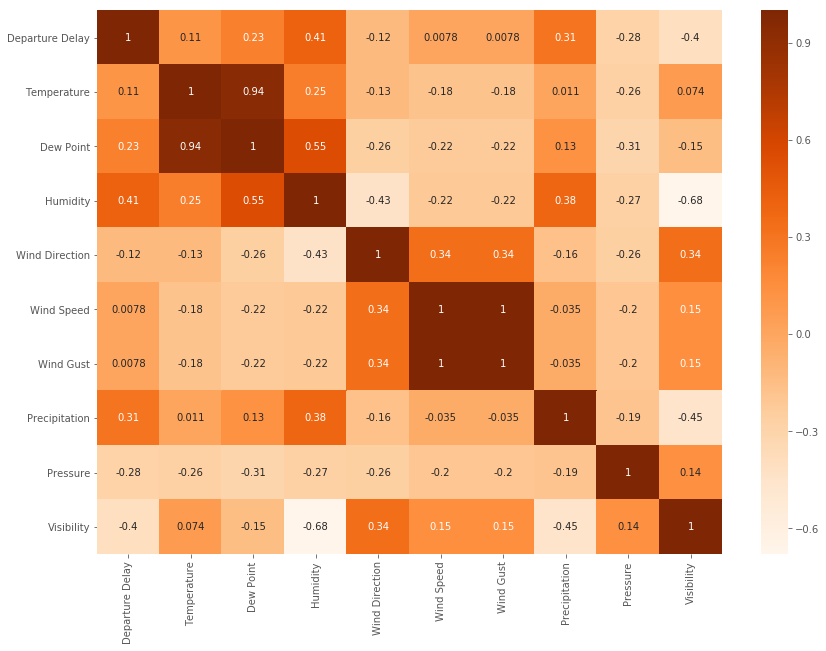

In [20]:
# Inner join the two data frames of weather and flights on 'date', 'origin', and 'hour' and group by 'date'
flights_with_weather = pd.merge(flights_df, weather_df, how = 'inner', on = ['date', 'origin', 'hour']).groupby(['date']).mean()

# Filter the data where delay > 0
flights_with_weather = flights_with_weather[flights_with_weather['dep_delay'] > 0]

# Calculate the correlation matrix
correlation_matrix = flights_with_weather[['dep_delay', 'temp', 'dewp', 'humid', 
                                           'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']].corr()

# Import Seaborn module
import seaborn as sns

# Plot the correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, cmap = 'Oranges', annot = True, xticklabels = ['Departure Delay', 'Temperature', 'Dew Point', 
                                                                            'Humidity', 'Wind Direction', 'Wind Speed', 
                                                                            'Wind Gust', 'Precipitation', 'Pressure', 'Visibility'], 
           yticklabels = ['Departure Delay', 'Temperature', 'Dew Point',
                          'Humidity', 'Wind Direction', 'Wind Speed', 
                          'Wind Gust', 'Precipitation', 'Pressure', 'Visibility'])

Observations:

It appears that the 'Departure Delay' is negatively correlated with 'Pressure', 'Visibility', and 'Wind Direction', while it is positively correlated with the rest of the parameters.

The magnitude of correlation of 'Departure Delay' reaches a maximum of 0.41 for 'Humidity', followed by -0.4 for 'Visibility' and 0.31 for 'Precipitation'.

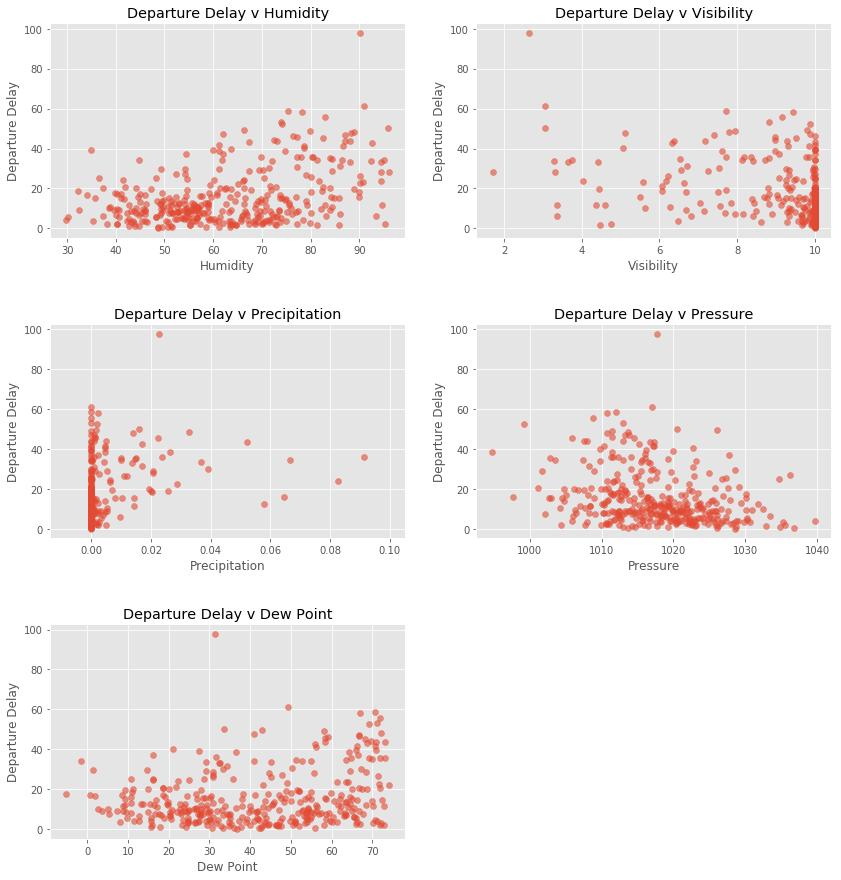

In [21]:
# Plot the 5 weather parameters which have the highest correlation with 'Departure Delay'

plt.figure(figsize=(14,15))
plt.subplot(3, 2, 1)
plt.scatter(flights_with_weather.humid, flights_with_weather.dep_delay, alpha = 0.6)
plt.title("Departure Delay v Humidity")
plt.ylabel('Departure Delay')
plt.xlabel('Humidity')

plt.subplot(3, 2, 2)
plt.scatter(flights_with_weather.visib, flights_with_weather.dep_delay, alpha = 0.6)
plt.title("Departure Delay v Visibility")
plt.ylabel('Departure Delay')
plt.xlabel('Visibility')

plt.subplot(3, 2, 3)
plt.scatter(flights_with_weather.precip, flights_with_weather.dep_delay, alpha = 0.6)
plt.title("Departure Delay v Precipitation")
plt.ylabel('Departure Delay')
plt.xlabel('Precipitation')

plt.subplot(3, 2, 4)
plt.scatter(flights_with_weather.pressure, flights_with_weather.dep_delay, alpha = 0.6)
plt.title("Departure Delay v Pressure")
plt.ylabel('Departure Delay')
plt.xlabel('Pressure')

plt.subplot(3, 2, 5)
plt.scatter(flights_with_weather.dewp, flights_with_weather.dep_delay, alpha = 0.6)
plt.title("Departure Delay v Dew Point")
plt.ylabel('Departure Delay')
plt.xlabel('Dew Point')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

plt.show()

Observations:

We see that the Departure Delay is comparatively higher for higher Humidity.

We may hypothesize that Departure Delay is higher when Visibility is lower, but it is hard to discern this pattern from the figure as it could be highly skewed with most of the observations having higher visibility.

Similarly, Departure Delay could be higher when Precipitation is higher, but it is hard to discern this pattern from the figure as it could be highly skewed with most of the observations having lower precipitation.

We could see that Departure Delay is negatively correlated with Pressure as Departure Delay seems to decrease with increase in Pressure.

We could see that Departure Delays seems to increase with increase in Dew Point.

All the observations made will require further investigation to confirm their validity.